# 1. Comparaison des trois méthodes :


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist

In [54]:
class_names=['1.5_1_CAMELIA._5_ALLURES', '1932_COLLECTION_(2022)',
       'BATH_AND_BODY', 'BELTS', 'BLUE_LIGHT_GLASSES', 'BODY',
       'BOY_DE_CHANEL', 'BRACELETS', 'BROOCHES',
       'BRUSHES_AND_ACCESSORIES', 'CAMELLIAS',
       'CLEANSERS___MAKEUP_REMOVERS', 'COCO_CRUSH', 'COMETE',
       'COSTUME_JEWELRY', 'EARRINGS', 'EXCEPTIONAL_PIECES', 'EYEGLASSES',
       'EYES', 'EYE___LIP_CARE', 'FACE', 'HANDBAGS', 'HEADWEAR',
       "L'ESPRIT_DU_LION", 'LES_INTEMPORELS_DE_CHANEL', 'LIPS',
       'MASKS___EXFOLIATORS', 'MASSAGE_ACCESSORIES', 'MEN', 'MISTS',
       'MOISTURIZERS', 'NAILS', 'NECKLACES', 'N_5', 'N_5_COLLECTION',
       'OILS', 'OTHER_ACCESSORIES', 'READY_TO_WEAR', 'RINGS', 'SCARVES',
       'SERUMS', 'SETS', 'SHOES', 'SMALL_LEATHER_GOODS',
       'SOUS_LE_SIGNE_DU_LION_HJ', 'SUNGLASSES', 'TONERS___LOTIONS',
       'WATCHES', 'WOMEN']

In [19]:
embeddings_vit = np.load('/content/VIT_embeddings.npy')
labels_VIT= np.load('/content/VIT_labels.npy')
# embeddings_simsim = np.load('/content/VIT_embeddings_intermediaire.npy')
embeddings_inception = np.load('/content/inceptionv3_embeddings.npy')
labels_inception = np.load('/content/inception_lables.npy')


In [15]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def intra_class_coherence(embeddings, labels):
    unique_labels = np.unique(labels)
    intra_distances = {}

    for label in unique_labels:
        class_embeddings = embeddings[labels == label]
        distances = euclidean_distances(class_embeddings)
        np.fill_diagonal(distances, np.nan)
        mean_distance = np.nanmean(distances)
        variance_distance = np.nanvar(distances)
        intra_distances[label] = (mean_distance, variance_distance)

    return intra_distances




In [32]:
coherence_inception = intra_class_coherence(embeddings_inception, labels_inception)
total_avg_distance = 0
total_variance = 0
num_classes =49
for label, metrics in coherence_inception.items():
    total_avg_distance += metrics[0]
    total_variance += metrics[1]

global_avg_distance = total_avg_distance / num_classes
global_variance = total_variance / num_classes

print("Statistiques globales de intra classe du modele Inception :")
print(f"Moyenne globale des moyennes intra-classe = {global_avg_distance}")
print(f"Moyenne globale des variances intra-classe = {global_variance}")

Statistiques globales de intra classe du modele Inception :
Moyenne globale des moyennes intra-classe = 0.1411918929340888
Moyenne globale des variances intra-classe = 0.0018830152391218484


In [26]:
coherence_vit = intra_class_coherence(embeddings_vit, labels_VIT)
total_avg_distance = 0
total_variance = 0
num_classes =49
for label, metrics in coherence_vit.items():
    total_avg_distance += metrics[0]
    total_variance += metrics[1]

global_avg_distance = total_avg_distance / num_classes
global_variance = total_variance / num_classes

print("Statistiques globales de intra classe du modele Vision Transformer :")
print(f"Moyenne globale des moyennes intra-classe = {global_avg_distance}")
print(f"Moyenne globale des variances intra-classe = {global_variance}")

Statistiques globales de intra classe du modele Vision Transformer :
Moyenne globale des moyennes intra-classe = 57.638658173230226
Moyenne globale des variances intra-classe = 1123.3306511080996


***inter classes***

In [46]:

def inter_class_coherence(embeddings, labels):
    unique_labels = np.unique(labels)
    inter_distances = {}

    for i, label_i in enumerate(unique_labels):
        class_i_embeddings = embeddings[labels == label_i]

        for j, label_j in enumerate(unique_labels):
            if i >= j:
                continue
            class_j_embeddings = embeddings[labels == label_j]

            distances = euclidean_distances(class_i_embeddings, class_j_embeddings).flatten()
            mean_distance = np.mean(distances)
            variance_distance = np.var(distances)

            inter_distances[(label_i, label_j)] = (mean_distance, variance_distance)

    return inter_distances


def interclass_distance(inter_distances):
    all_mean_distances = [mean_distance for mean_distance, _ in inter_distances.values()]
    global_mean_distance = np.mean(all_mean_distances)
    return global_mean_distance


In [49]:
coherence_inception = inter_class_coherence(embeddings_inception, labels_inception)
distance = interclass_distance(coherence_inception)
print(f"La distance inter-classe Inception  est : {distance}")


La distance inter-classe Inception  est : 0.25127580761909485


In [50]:
coherence_vit = inter_class_coherence(embeddings_vit, labels_VIT)
distance = interclass_distance(coherence_vit)
print(f"La distance inter-classe Inception  est : {distance}")


La distance inter-classe Inception  est : 58.851009368896484


***Sélectionner des exemples représentatifs (par exemple, un sac, un parfum,
un produit cosmétique) et comparer les distances entre leurs embeddings
générés par les trois méthodes***

In [64]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


selected_indices =[class_names.index('OILS'),class_names.index('TONERS___LOTIONS'),class_names.index('HANDBAGS')]
def distancesEntreClasse(embeddings, selected_indices):
    selected_embeddings = embeddings[selected_indices]
    distances = euclidean_distances(selected_embeddings)
    return distances


distances_vit = distancesEntreClasse(embeddings_vit, selected_indices)
distances_inception = distancesEntreClasse(embeddings_inception, selected_indices)

print("Distances VIT :")
print(distances_vit)

print("Distances Inception :")
print(distances_inception)


Distances VIT :
[[ 0.       27.551773 24.52867 ]
 [27.551773  0.       18.089605]
 [24.52867  18.089605  0.      ]]
Distances Inception :
[[0.         0.2569301  0.39114407]
 [0.2569301  0.         0.25009033]
 [0.39114407 0.25009033 0.        ]]


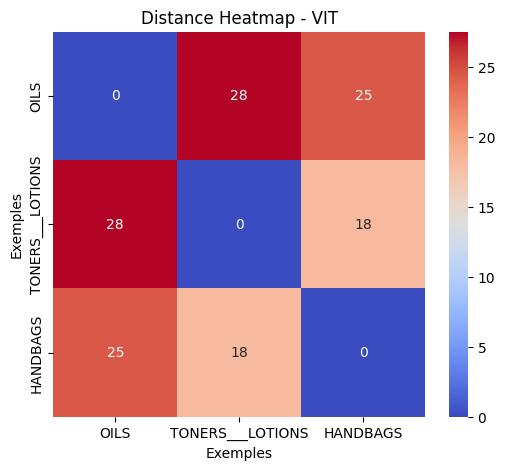

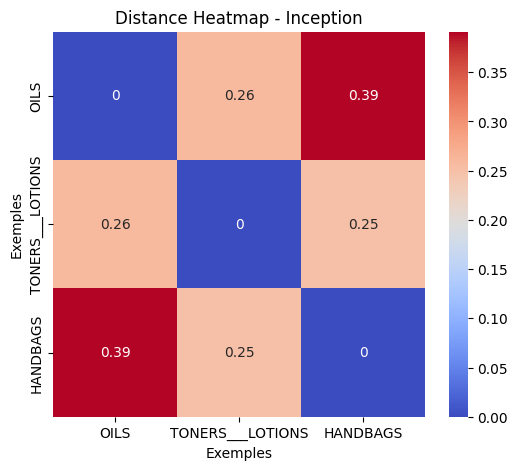

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distance_heatmap(distances, method_name):
    selected_class_names =['OILS','TONERS___LOTIONS','HANDBAGS']
    plt.figure(figsize=(6, 5))
    sns.heatmap(distances, annot=True, cmap="coolwarm", xticklabels=selected_class_names, yticklabels=selected_class_names)
    plt.title(f"Distance Heatmap - {method_name}")
    plt.xlabel("Exemples")
    plt.ylabel("Exemples")
    plt.show()

plot_distance_heatmap(distances_vit, "VIT")
plot_distance_heatmap(distances_inception, "Inception")


***Visualisation des embeddings via t-SNE***

In [68]:
import plotly.express as px
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd


def visualize_embeddings_tsne_plotly(embeddings, labels, class_names):
    if embeddings.ndim > 2:
        embeddings = embeddings.reshape(embeddings.shape[0], -1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    reduced_embeddings = tsne.fit_transform(embeddings)

    df = pd.DataFrame(reduced_embeddings, columns=['tsne_1', 'tsne_2'])
    df['label'] = labels
    df['class_name'] = df['label'].map(lambda x: class_names[x])

    fig = px.scatter(df, x='tsne_1', y='tsne_2', color='class_name',
                     hover_data=['class_name'],
                     title='Visualisation des embaddings de Inception avec Plotly')

    fig.show()



visualize_embeddings_tsne_plotly(embeddings_inception, labels_inception, class_names)

Embeddings shape before visualization: (6952, 49)


In [69]:

# L'explication de le rapport

def visualize_embeddings_tsne_plotly(embeddings, labels, class_names):
    if embeddings.ndim > 2:
        embeddings = embeddings.reshape(embeddings.shape[0], -1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    reduced_embeddings = tsne.fit_transform(embeddings)

    df = pd.DataFrame(reduced_embeddings, columns=['tsne_1', 'tsne_2'])
    df['label'] = labels
    df['class_name'] = df['label'].map(lambda x: class_names[x])

    fig = px.scatter(df, x='tsne_1', y='tsne_2', color='class_name',
                     hover_data=['class_name'],
                     title='Visualisation des embaddings de Vision Transformer avec Plotly')

    fig.show()



visualize_embeddings_tsne_plotly(embeddings_vit, labels_VIT, class_names)